## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Giovanni Rosati (Part-time pacing)

Instructor: Jeff Herman

Blog URL: 

GitHub: https://github.com/giorosati/dsc-3-final-project-online-ds-pt-100118


NOTES

OSEMN process
* Obtain
* Scrub
* Explore
* Model
* iNterpret

# Module 3 Final Project



Citation requested:

Kelwin Fernandes, Jaime S. Cardoso, and Jessica Fernandes. 'Transfer Learning with Partial Observability Applied to Cervical Cancer Screening.' Iberian Conference on Pattern Recognition and Image Analysis. Springer International Publishing, 2017.

Dataset link: https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29#

In [157]:
# needed imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
from scipy.stats import norm

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler

from scipy import stats

# np.random.seed(0) # for reproducibility
%matplotlib inline

ModuleNotFoundError: No module named 'imblearn'

In [3]:
# !pip list

In [4]:
# added this cell to look at the data before converting ? values to NaN using na_values="?"
# df_test = pd.read_csv('risk_factors_cervical_cancer.csv')

# for column in df_test.columns:
#     print('Unique values and count in {}'.format(column))
#     print(pd.value_counts(df_test[column].values))

In [5]:
# load the dataset as a Pandas dataframe
df_import = pd.read_csv('risk_factors_cervical_cancer.csv', na_values="?")

In [6]:
df_import.shape

(858, 36)

In [7]:
df_import.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [8]:
df_test = df_import[['Dx:Cancer', 'Biopsy']].copy(deep=True)


In [9]:
df_test['Dx:Cancer'].value_counts(dropna=False)

0    840
1     18
Name: Dx:Cancer, dtype: int64

In [10]:
df_test['Biopsy'].value_counts(dropna=False)

0    803
1     55
Name: Biopsy, dtype: int64

In [11]:
for column in df_import.columns:
    print('Unique values and count in {}'.format(column))
    print(df_import[column].value_counts(dropna=False))

Unique values and count in Age
23    54
18    50
21    46
20    45
19    44
24    39
25    39
26    38
28    37
30    35
17    35
29    33
27    33
22    30
35    29
33    28
31    27
36    24
34    24
16    23
15    21
32    18
37    17
41    13
40    12
39     9
38     9
45     6
44     6
42     6
43     5
14     5
46     3
48     2
49     2
52     2
70     2
84     1
79     1
47     1
50     1
51     1
59     1
13     1
Name: Age, dtype: int64
Unique values and count in Number of sexual partners
 2.0     272
 3.0     208
 1.0     206
 4.0      78
 5.0      44
NaN       26
 6.0       9
 7.0       7
 8.0       4
 9.0       1
 28.0      1
 10.0      1
 15.0      1
Name: Number of sexual partners, dtype: int64
Unique values and count in First sexual intercourse
 15.0    163
 17.0    151
 18.0    137
 16.0    121
 14.0     79
 19.0     60
 20.0     37
 13.0     25
 21.0     20
 22.0      9
 23.0      9
NaN        7
 26.0      7
 12.0      6
 24.0      6
 27.0      6
 29.0      5
 28.0   

In [12]:
for column in df_import.columns:
    print(column)

Age
Number of sexual partners
First sexual intercourse
Num of pregnancies
Smokes
Smokes (years)
Smokes (packs/year)
Hormonal Contraceptives
Hormonal Contraceptives (years)
IUD
IUD (years)
STDs
STDs (number)
STDs:condylomatosis
STDs:cervical condylomatosis
STDs:vaginal condylomatosis
STDs:vulvo-perineal condylomatosis
STDs:syphilis
STDs:pelvic inflammatory disease
STDs:genital herpes
STDs:molluscum contagiosum
STDs:AIDS
STDs:HIV
STDs:Hepatitis B
STDs:HPV
STDs: Number of diagnosis
STDs: Time since first diagnosis
STDs: Time since last diagnosis
Dx:Cancer
Dx:CIN
Dx:HPV
Dx
Hinselmann
Schiller
Citology
Biopsy


In [13]:
df_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             832 non-null float64
First sexual intercourse              851 non-null float64
Num of pregnancies                    802 non-null float64
Smokes                                845 non-null float64
Smokes (years)                        845 non-null float64
Smokes (packs/year)                   845 non-null float64
Hormonal Contraceptives               750 non-null float64
Hormonal Contraceptives (years)       750 non-null float64
IUD                                   741 non-null float64
IUD (years)                           741 non-null float64
STDs                                  753 non-null float64
STDs (number)                         753 non-null float64
STDs:condylomatosis                   753 non-null float64
STDs:cervical condylomatosis          753 non-null float64
STDs:vaginal

In [14]:
df_import.isna().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [15]:
# for column in df_import.columns:
#     print('Unique values in {}'.format(column))
#     values_list = df_import[column].unique()
#     values_list.sort()
#     print (values_list)
        

In [16]:
# copy the import to a new dataframe
df = df_import.copy(deep=True)

# NEED TO REDO THIS

Many of the factors have missing values,

I plan to create new factors so that the information contained between those records with a value and without is not lost. 

Smokes, Hormonal Contraceptives, IUD, and STDs are all boolean factors with missing values. I will change these factors to categorical factors with three values: True, False, Unknown.

For factors that are ordinal (Number of sexual partners, First sexual intercourse, Num of pregnancies) I will create an new boolean factor to identify which records had a value from those that did not, and then replace the missing values with the mean from that factor.



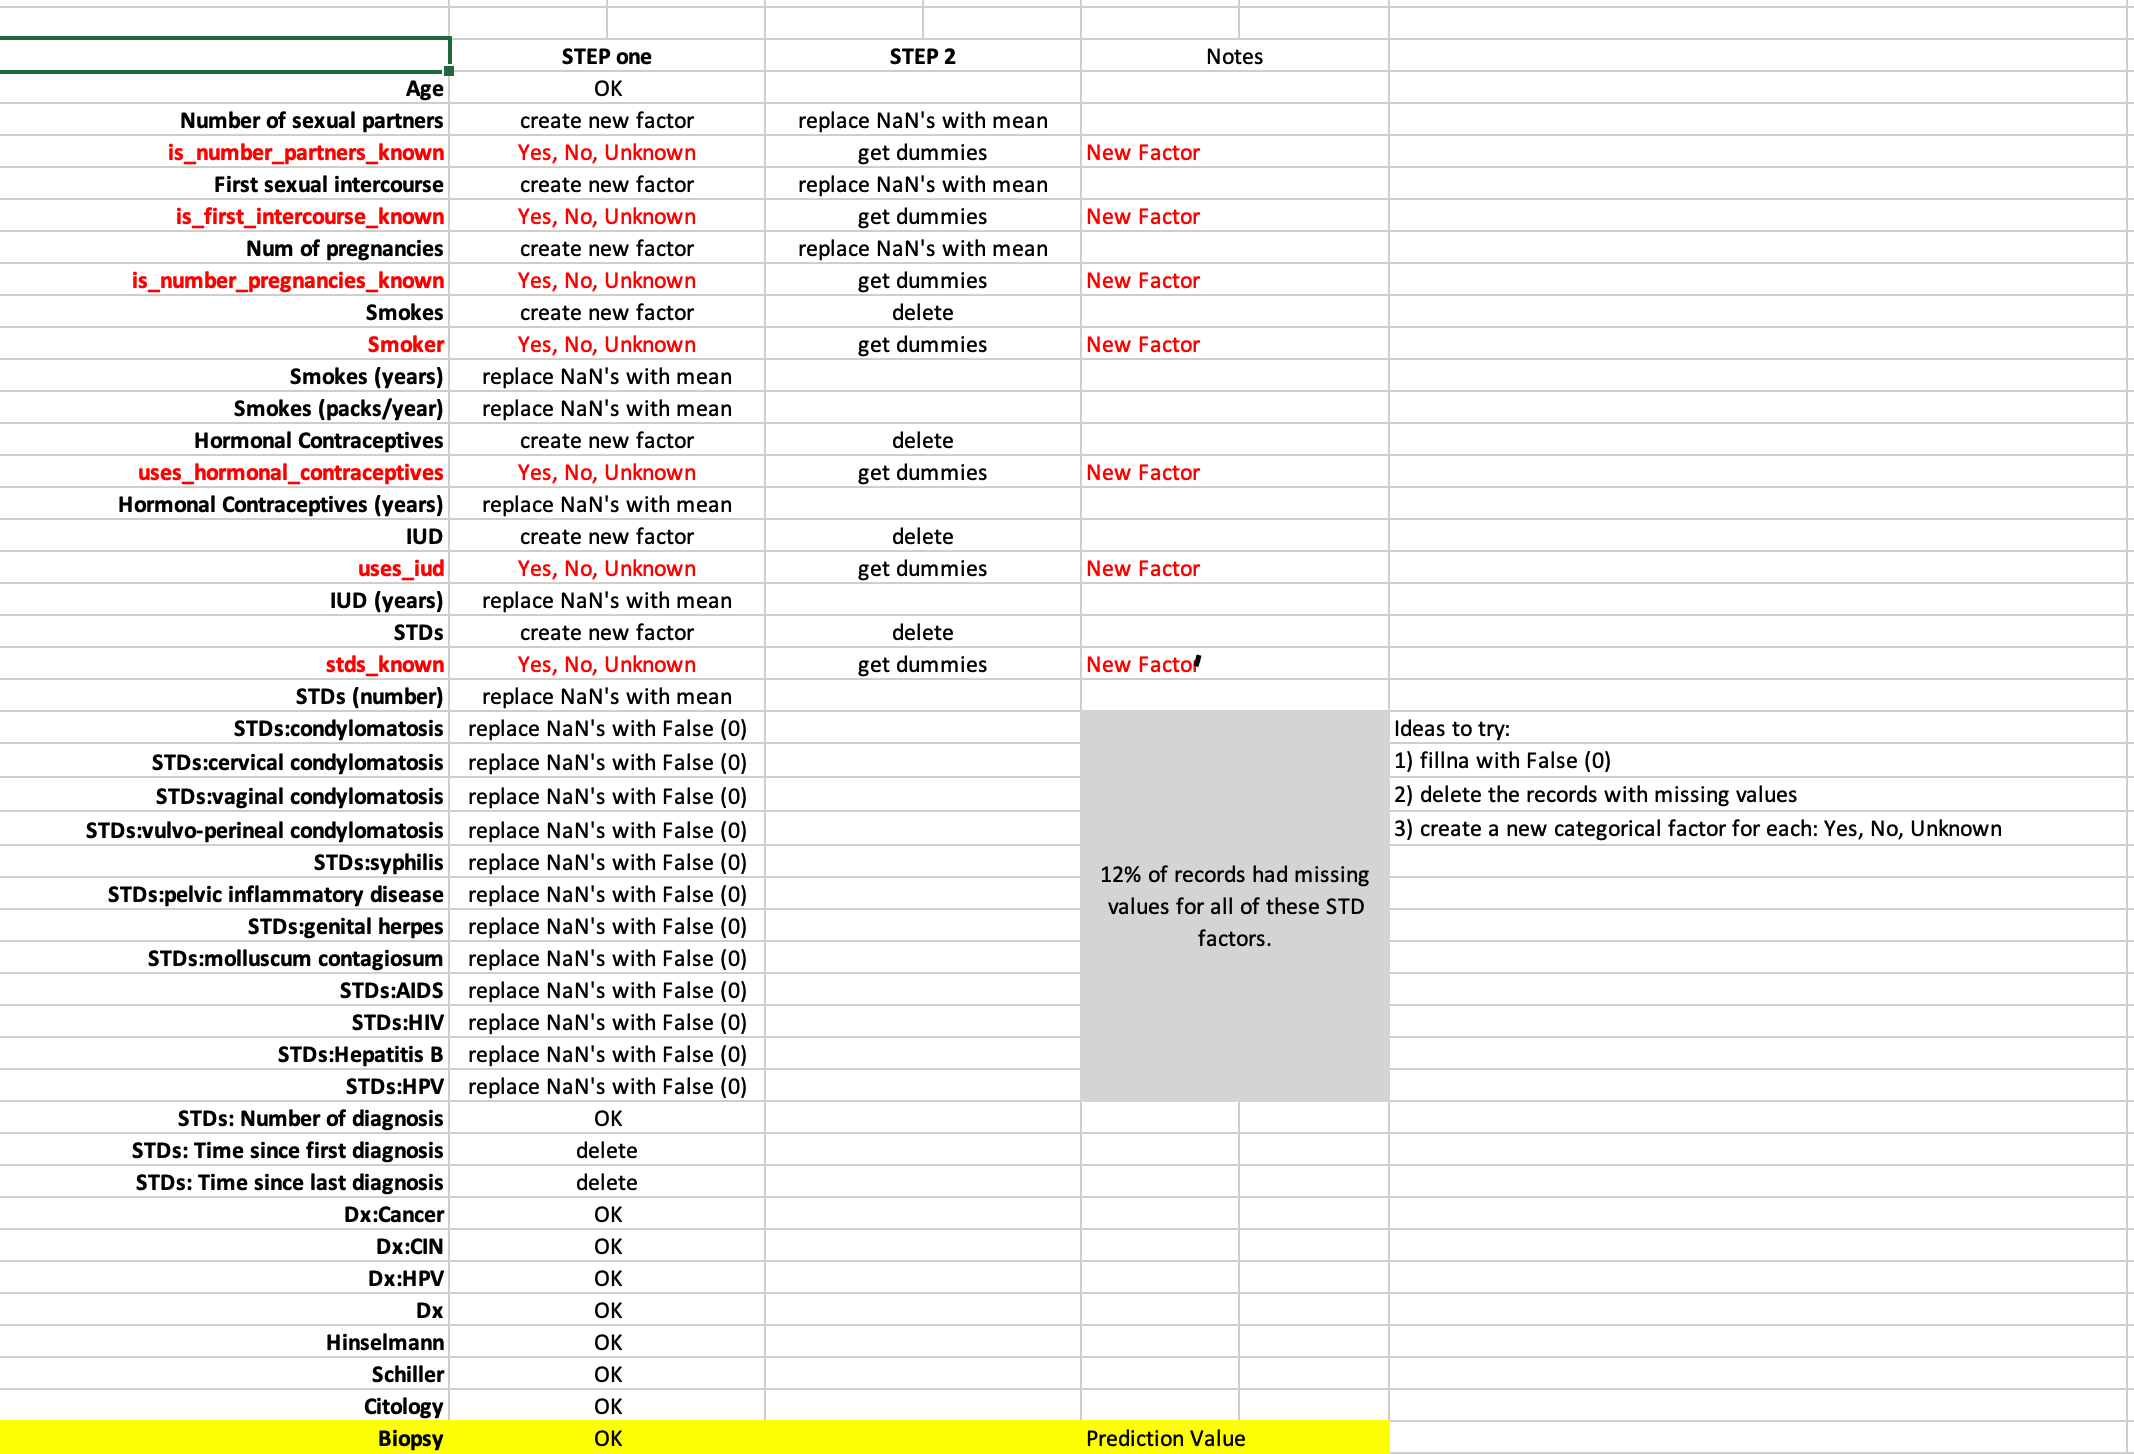

In [17]:
# function to create a new boolean column in a df,
# given a column with int, float, and/or numpy.nan values.

def new_bool(df, col_name):
    bool_list = []
    for index, row in df.iterrows():
#         print(row)
        value = row[col_name]
#         print(value)
        value_out = 1  # originally used value_out = np.True
        if pd.isna(value):
            value_out = 0  # originally used value_out = np.False
            
#       for testing
#         print("value: {}   -   bool: {}".format(value, str(value_out)))

        bool_list.append(value_out)

    return bool_list

#       for testing
#         print("value: {}   -   bool: {}".format(value, str(row[new_col_name])))


In [18]:
# create new factor 'is_number_partners_known'
df['is_number_partners_known'] = new_bool(df, 'Number of sexual partners')

In [19]:
# check if operation was successful
df['is_number_partners_known'].value_counts(dropna=False)

1    832
0     26
Name: is_number_partners_known, dtype: int64

In [20]:
# create new factor 'is_first_intercourse_known'
df['is_first_intercourse_known'] = new_bool(df, 'First sexual intercourse')

In [21]:
# check if operation was successful
df['is_first_intercourse_known'].value_counts(dropna=False)

1    851
0      7
Name: is_first_intercourse_known, dtype: int64

In [22]:
# create new factor 'is_number_pregnancies_known'
df['is_number_pregnancies_known'] = new_bool(df, 'Num of pregnancies')

In [23]:
# check if operation was successful
df['is_number_pregnancies_known'].value_counts(dropna=False)

1    802
0     56
Name: is_number_pregnancies_known, dtype: int64

In [24]:
# function to replace boolean factors that have missing values with a categorical factor with three values:
# Yes, No, Unknown

def new_categorical(df, col_name):
    values_list = []
    for index, row in df.iterrows():
        value = row[col_name]
        
#         print('original value: {}'.format(value))
        if pd.isna(value):
            value = "Unknown"
        elif value == 1:
            value = "Yes"
        else:
            value = "No"
        
#         print('new value: {}'.format(value))
        values_list.append(value)
    
    return values_list


In [25]:
# replaced these with get_dummies(dummy_na=True)

# # create new factor 'is_number_pregnancies_known'
# df['smoker'] = new_categorical(df, 'Smokes')

# # check if operation was successful
# df['smoker'].value_counts()

In [26]:
# # create new factor 'uses_hormonal_contraceptives'
# df['uses_hormonal_contraceptives'] = new_categorical(df, 'Hormonal Contraceptives')

# # check if operation was successful
# df['uses_hormonal_contraceptives'].value_counts()


In [27]:
# # create new factor 'uses_iud'
# df['uses_iud'] = new_categorical(df, 'IUD')

# # check if operation was successful
# df['uses_iud'].value_counts()


In [28]:
# # create new factor 'stds_known'
# df['stds_known'] = new_categorical(df, 'STDs')

# # check if operation was successful
# df['stds_known'].value_counts()



* replace NaN's with mean:
    * Number of sexual partners
    * First sexual intercourse
    * Num of pregnancies
    * Smokes (years)
    * Smokes (packs/year)
    * Hormonal Contraceptives (years)
    * IUD (years)
    * STDs (number)
      
* replace NaN's with zero:  -  change this to make new categorical factors
    * STDs:condylomatosis
    * STDs:cervical condylomatosis
    * STDs:vaginal condylomatosis
    * STDs:vulvo-perineal condylomatosis
    * STDs:syphilis
    * STDs:pelvic inflammatory disease
    * STDs:genital herpes
    * STDs:molluscum contagiosum
    * STDs:AIDS
    * STDs:HIV
    * STDs:Hepatitis B
    * STDs:HPV
    
* Drop columns:
    * Smokes
    * Hormonal Contraceptives
    * IUD
    * STDs
    * STDs: Time since first diagnosis
    * STDs: Time since last diagnosis
    
* get dummies for categorical factors:
    * is_number_partners_known
    * is_first_intercourse_known
    * is_number_pregnancies_known
    * smoker
    * uses_hormonal_contraceptives
    * uses_iud
    * stds_known
    

In [29]:
df2 = df.copy(deep=True)


In [30]:
# drop the columns that have missing values over 90%
df2 = df.drop(['STDs: Number of diagnosis',
             'STDs: Time since first diagnosis',
             'STDs: Time since last diagnosis'], axis=1)

In [31]:
# replace continious factors missing values with the mean (or median) for each factor 
col_list = ['Number of sexual partners',
    'First sexual intercourse',
    'Num of pregnancies',
    'Hormonal Contraceptives (years)',
    'IUD (years)']


# to add the mean
# for col in col_list:
#     df2[col].fillna(df2[column].mean(), inplace=True)
    
# to add the median
for col in col_list:
    df2[col].fillna(df2[col].median(), inplace=True)
    

In [32]:
# replace missing values in these factors with a zero
col_list = ['Smokes',
    'Smokes (years)',
    'Smokes (packs/year)',
    'STDs (number)',
    'STDs:condylomatosis',
    'STDs:cervical condylomatosis',
    'STDs:vaginal condylomatosis',
    'STDs:vulvo-perineal condylomatosis',
    'STDs:syphilis',
    'STDs:pelvic inflammatory disease',
    'STDs:genital herpes',
    'STDs:molluscum contagiosum',
    'STDs:AIDS',
    'STDs:HIV',
    'STDs:Hepatitis B',
    'STDs:HPV']


for col in col_list:
    df2[col].fillna(0, inplace=True)


In [33]:
df2.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,is_number_partners_known,is_first_intercourse_known,is_number_pregnancies_known
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,750.000000,858.000000,741.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.995338,2.257576,0.143357,1.201241,0.446278,0.641333,2.035331,0.112011,...,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103,0.969697,0.991841,0.934732
std,8.497948,1.644759,2.791883,1.400981,0.350641,4.060623,2.210351,0.479929,3.567040,0.315593,...,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078,0.171520,0.090008,0.247142
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
df2.isna().sum()

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                  0
Smokes (years)                          0
Smokes (packs/year)                     0
Hormonal Contraceptives               108
Hormonal Contraceptives (years)         0
IUD                                   117
IUD (years)                             0
STDs                                  105
STDs (number)                           0
STDs:condylomatosis                     0
STDs:cervical condylomatosis            0
STDs:vaginal condylomatosis             0
STDs:vulvo-perineal condylomatosis      0
STDs:syphilis                           0
STDs:pelvic inflammatory disease        0
STDs:genital herpes                     0
STDs:molluscum contagiosum              0
STDs:AIDS                               0
STDs:HIV                                0
STDs:Hepatitis B                  

In [35]:
# Revised this - because there were values with zero and values with no data, decided to use get_dummies
# with the kwarg that creates a column for records that have no value
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html


# drop two factors that have no information
# df2.drop(['STDs:cervical condylomatosis','STDs:AIDS'], axis=1, inplace=True)

In [36]:
# same revision as cell above

# replace missing values in boolean factors with 0 (False)


    
# for col in col_list:
#     df2[col].fillna(0, inplace=True)

In [37]:
# replaced with the cell below

# col_list = ['is_number_partners_known',
#             'is_first_intercourse_known',
#             'is_number_pregnancies_known',
#             'smoker',
#             'uses_hormonal_contraceptives',
#             'uses_iud',
#             'stds_known',
#             'Dx:Cancer',
#             'Dx:CIN',
#             'Dx:HPV',
#             'Dx',
#             'Hinselmann',
#             'Schiller',
#             'Citology']

# for col in col_list:
#     df2[col] = 

In [38]:
# original version
# df2 = pd.get_dummies(
#     data=df2, 
#     dummy_na=True, 
#     columns=['is_number_partners_known',
#              'is_first_intercourse_known',
#              'is_number_pregnancies_known',
#              'Smokes',
#              'Hormonal Contraceptives',
#              'IUD',
#              'STDs',
#              'Dx:Cancer',
#              'Dx:CIN',
#              'Dx:HPV',
#              'Dx',
#              'Hinselmann',
#              'Schiller',
#              'Citology',
#              'STDs:condylomatosis',
#              'STDs:cervical condylomatosis',
#              'STDs:vaginal condylomatosis',
#              'STDs:vulvo-perineal condylomatosis',
#              'STDs:syphilis',
#              'STDs:pelvic inflammatory disease',
#              'STDs:genital herpes',
#              'STDs:molluscum contagiosum',
#              'STDs:AIDS',
#              'STDs:HIV',
#              'STDs:Hepatitis B', 
#              'STDs:HPV',
#              'Dx:Cancer',
#              'Dx:CIN',
#              'Dx:HPV',
#              'Dx',
#              'Hinselmann',
#              'Schiller',
#              'Citology'])

In [39]:
df2 = pd.get_dummies(
    data=df2, 
    dummy_na=True, 
    columns=['Hormonal Contraceptives',
             'IUD',
             'STDs',])

In [40]:
df2.isna().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives (years)       0
IUD (years)                           0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0
Dx:Cancer                             0
Dx:CIN                                0
Dx:HPV                                0


# this is now inaccurate

This created columns that have no information - for categorical factors (bools too) that did not 
have any NaN, a NaN factor was created anyway:

* is_number_partners_known_nan
* is_first_intercourse_known_nan
* is_number_pregnancies_known_nan
* Dx_Cancer_nan
* Dx_CIN_nan
* Dx_HPV_nan
* Dx_nan
* Hinselmann_nan
* Schiller_nan
* Citology_nan

These columns could be deleted.

In [41]:
# col_list = ['is_number_partners_known_nan',
#             'is_first_intercourse_known_nan',
#             'is_number_pregnancies_known_nan',
#             'Dx:Cancer_nan',
#             'Dx:CIN_nan',
#             'Dx:HPV_nan',
#             'Dx_nan',
#             'Hinselmann_nan',
#             'Schiller_nan',
#             'Citology_nan']

# for col in col_list:
#     df2.drop([col], axis=1, inplace=True)

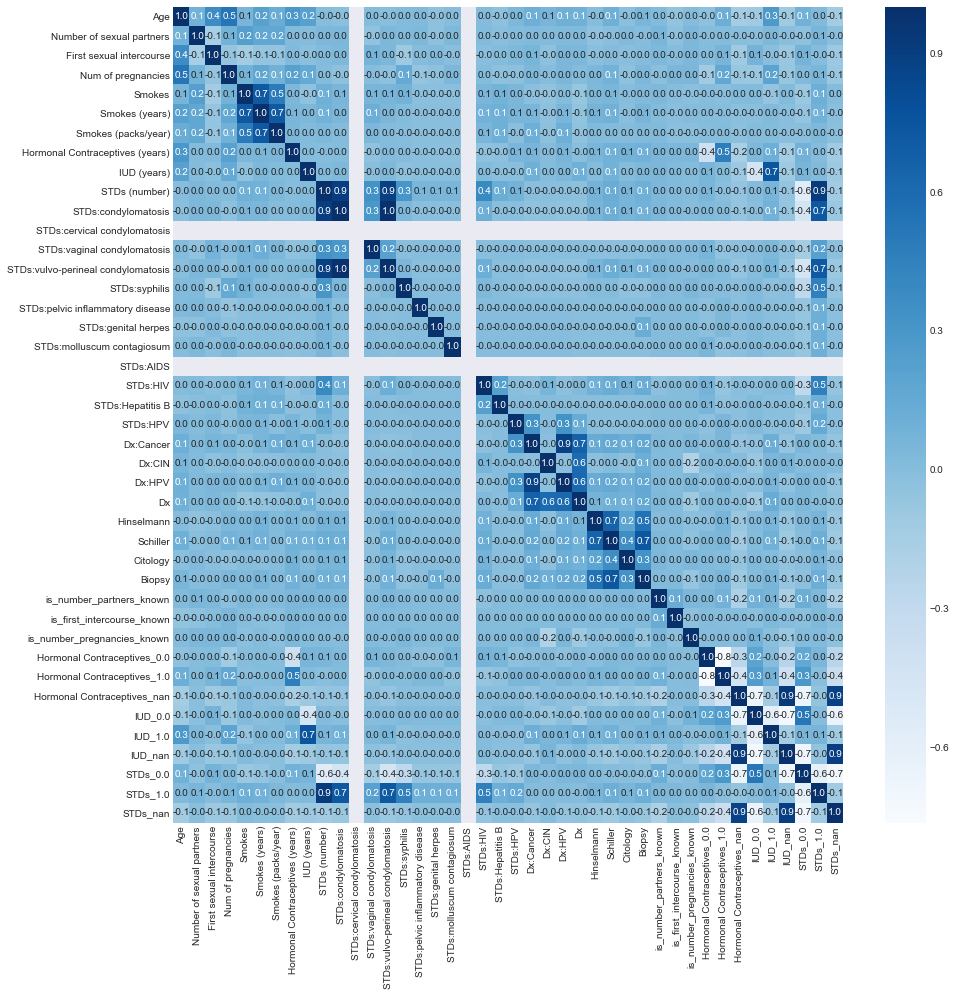

In [42]:
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(df2.loc[:,:].corr(), annot=True, cmap="Blues", fmt='.1f')
plt.show()

Two factors appear to have no information, ie. all values are the same for the factor.

In [43]:
# drop useless factors
df2.drop(['STDs:cervical condylomatosis','STDs:AIDS'], axis=1, inplace=True)

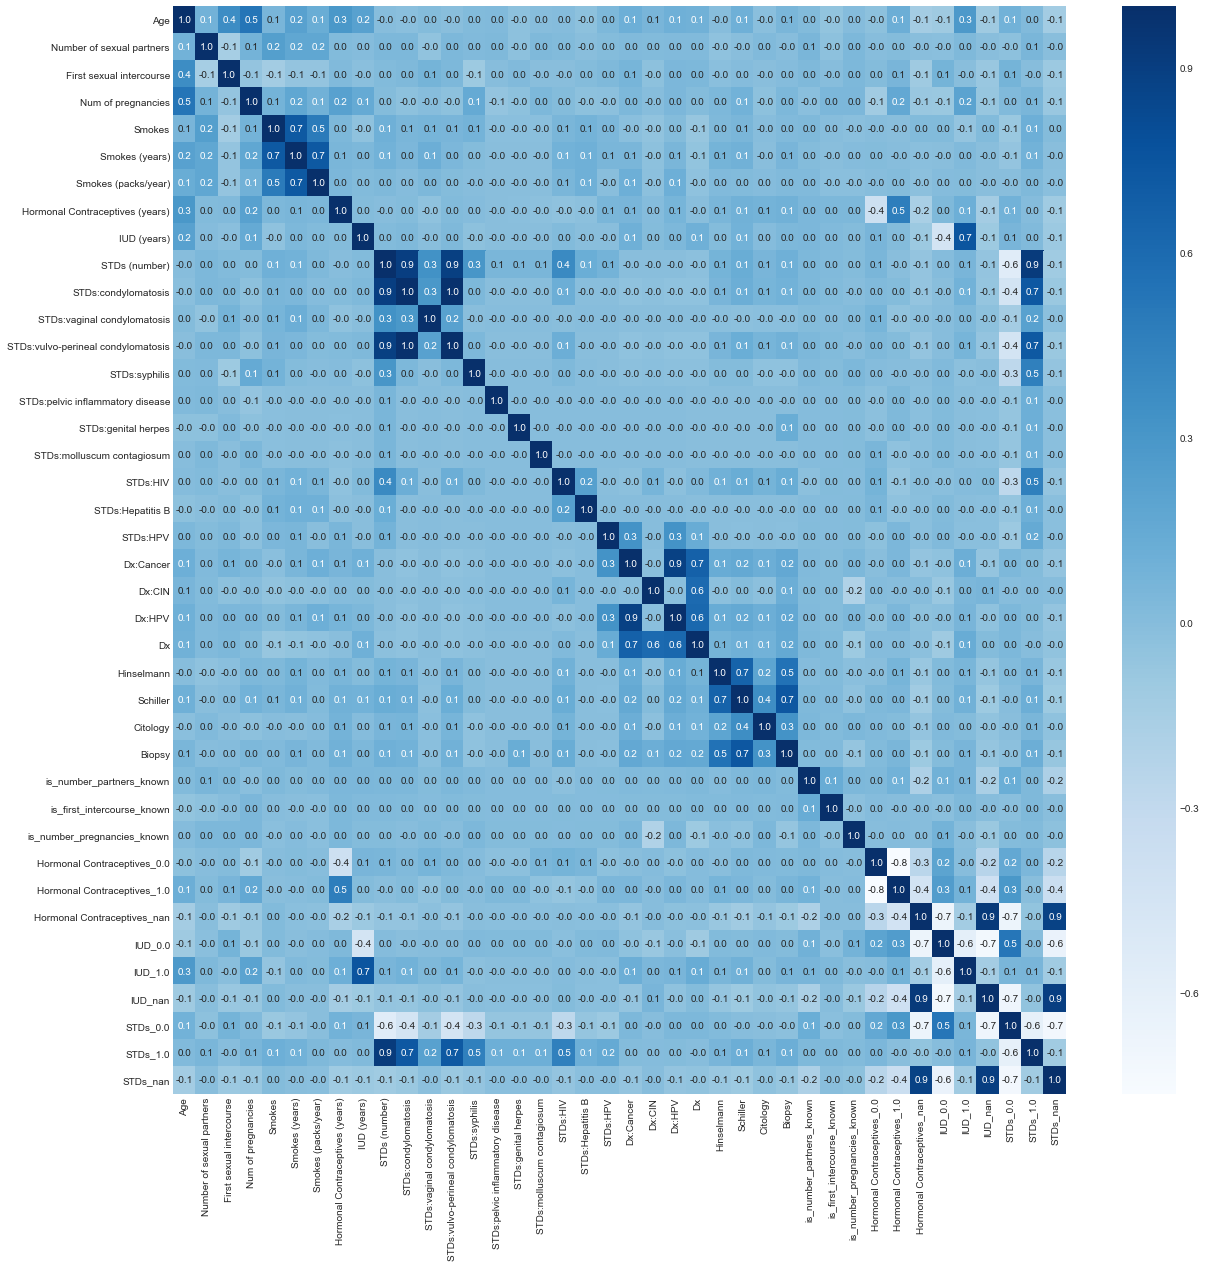

In [44]:
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(df2.loc[:,:].corr(), annot=True, cmap="Blues", fmt='.1f')
plt.show()

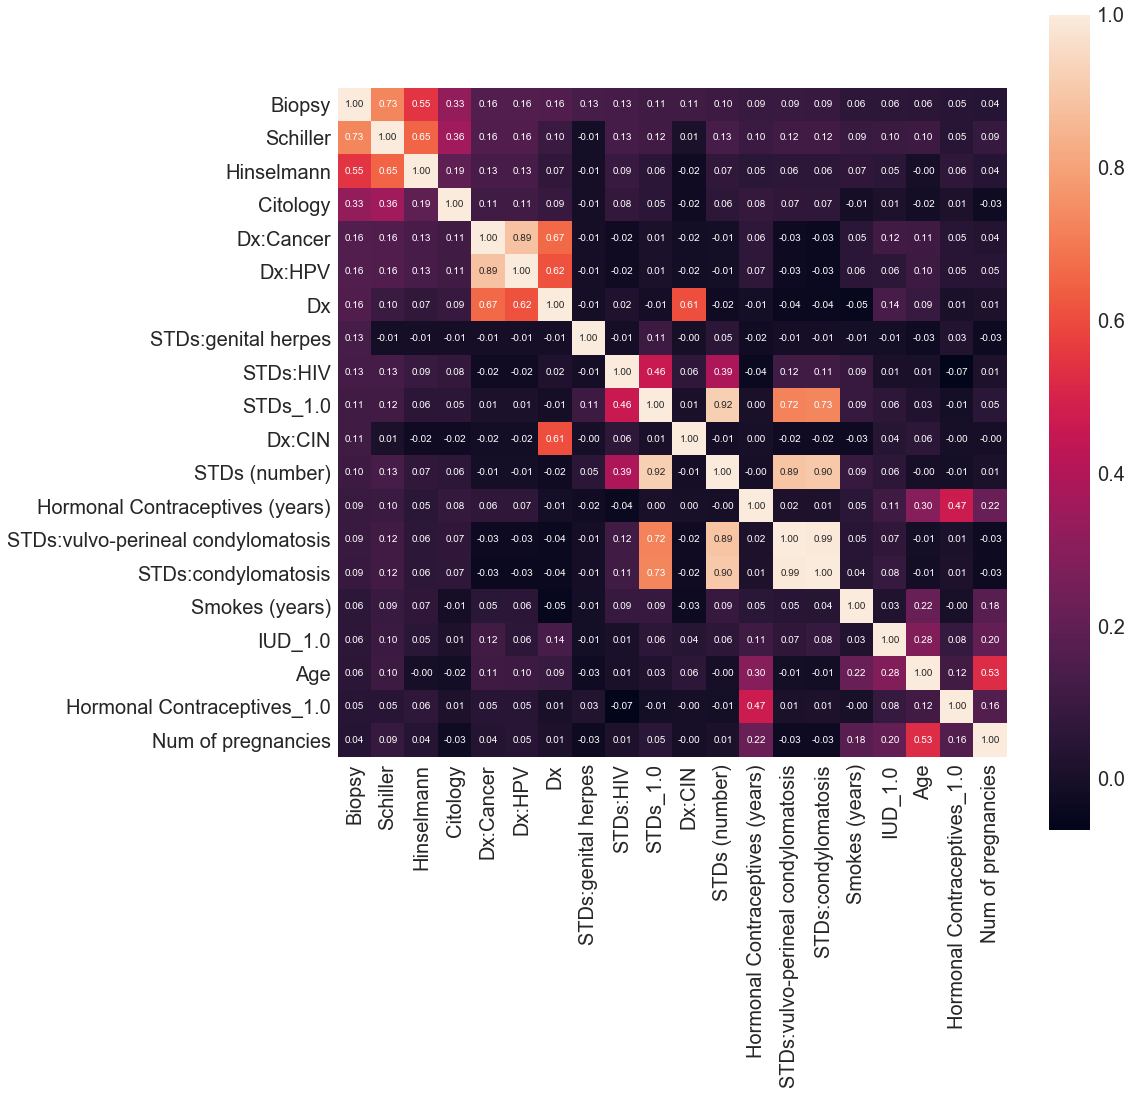

In [45]:
# look at a correlation matrix of the top 20 factors to the target variable: Biopsy

corrmat = df2.corr()
k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Biopsy')['Biopsy'].index
cm = np.corrcoef(df2[cols].values.T)

plt.figure(figsize=(15,15))

sns.set(font_scale=2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()

In [46]:
# make a copy of df2
df_backup = df2.copy()

In [47]:
df2.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),...,is_number_pregnancies_known,Hormonal Contraceptives_0.0,Hormonal Contraceptives_1.0,Hormonal Contraceptives_nan,IUD_0.0,IUD_1.0,IUD_nan,STDs_0.0,STDs_1.0,STDs_nan
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.995338,2.257576,0.143357,1.201241,0.446278,2.035331,0.444604,0.155012,...,0.934732,0.313520,0.560606,0.125874,0.766900,0.096737,0.136364,0.785548,0.092075,0.122378
std,8.497948,1.644759,2.791883,1.400981,0.350641,4.060623,2.210351,3.567040,1.814218,0.529617,...,0.247142,0.464194,0.496603,0.331901,0.423052,0.295771,0.343374,0.410681,0.289300,0.327913
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,30.000000,19.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


It appears that only these factors have a signifigant correlation to Biopsy:
* Schiller
* Hinselman
* Citology

In [48]:
# look at the distribution of the continuous factors
continuous_cols = ['Age',
            'Number of sexual partners',
            'First sexual intercourse',
            'Num of pregnancies',
            'Smokes (years)',
            'Smokes (packs/year)',
            'Hormonal Contraceptives (years)',
            'IUD (years)',
            'STDs (number)']


/Users/giovanni/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


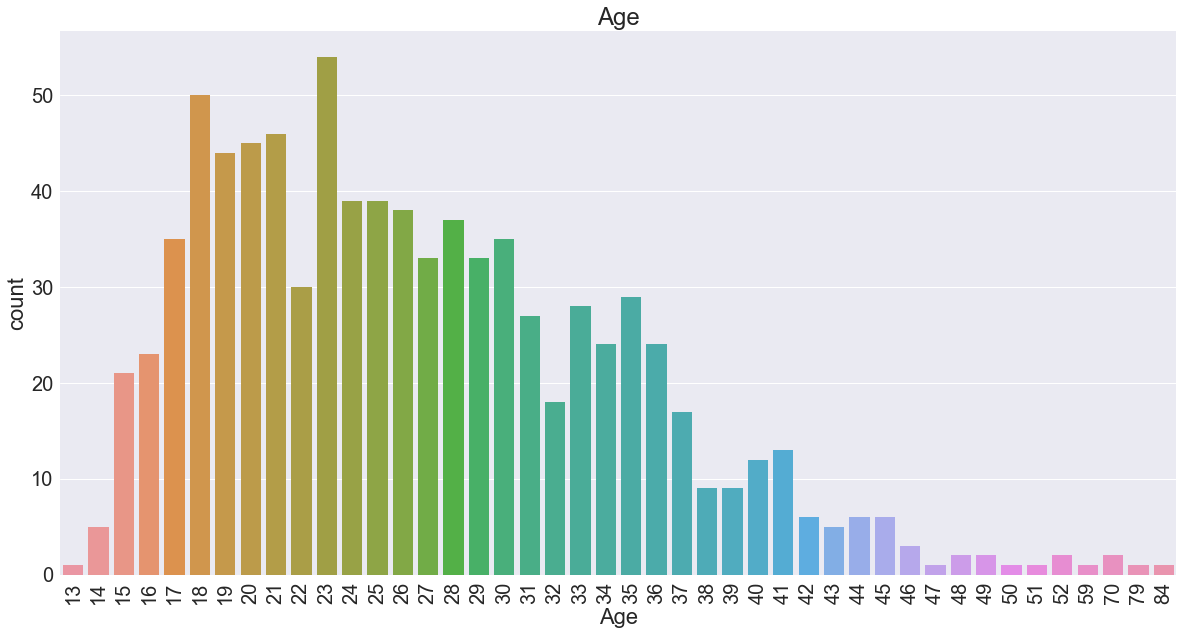



count    858.000000
mean      26.820513
std        8.497948
min       13.000000
25%       20.000000
50%       25.000000
75%       32.000000
max       84.000000
Name: Age, dtype: float64
************************************************


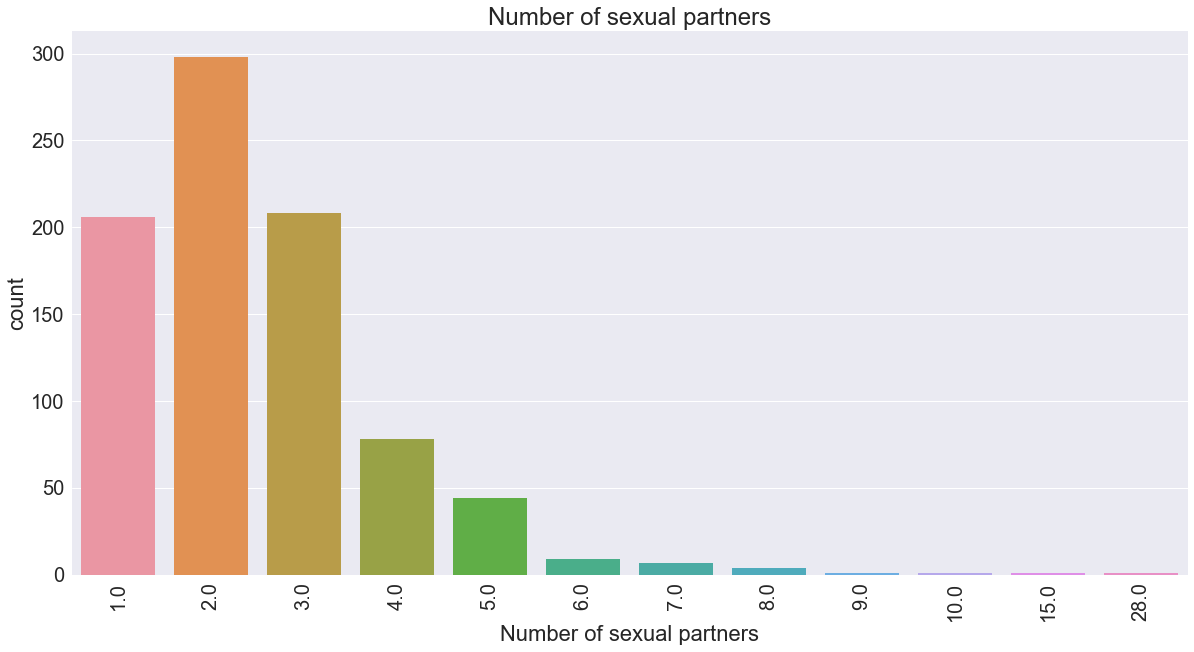



count    858.000000
mean       2.511655
std        1.644759
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       28.000000
Name: Number of sexual partners, dtype: float64
************************************************


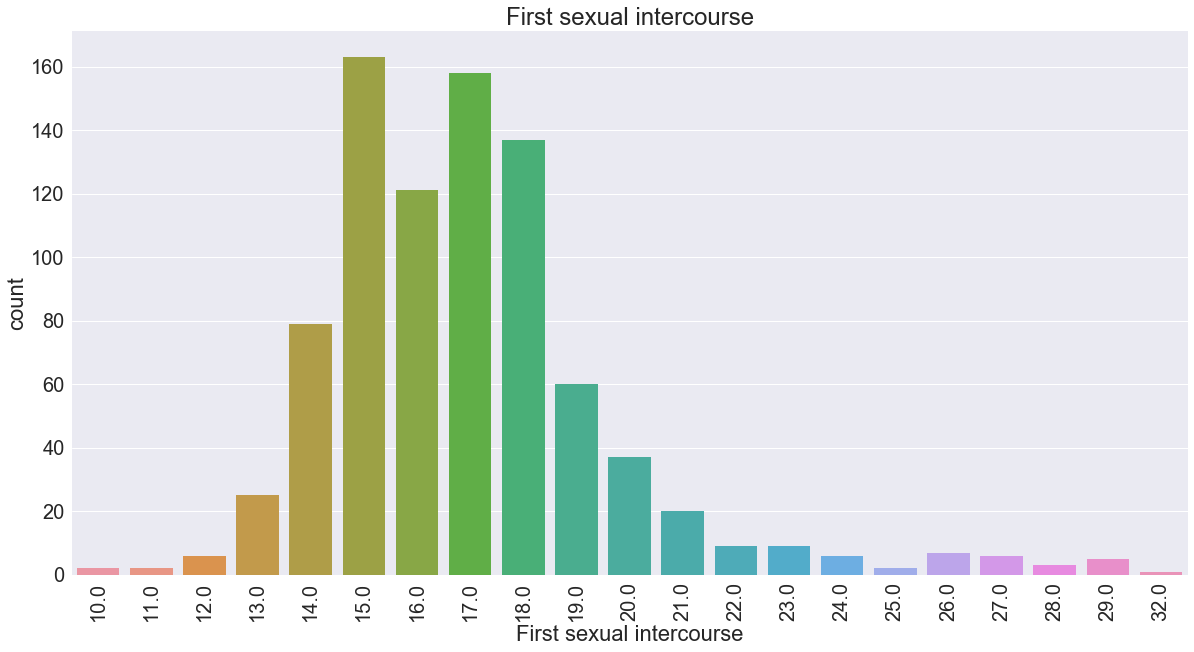



count    858.000000
mean      16.995338
std        2.791883
min       10.000000
25%       15.000000
50%       17.000000
75%       18.000000
max       32.000000
Name: First sexual intercourse, dtype: float64
************************************************


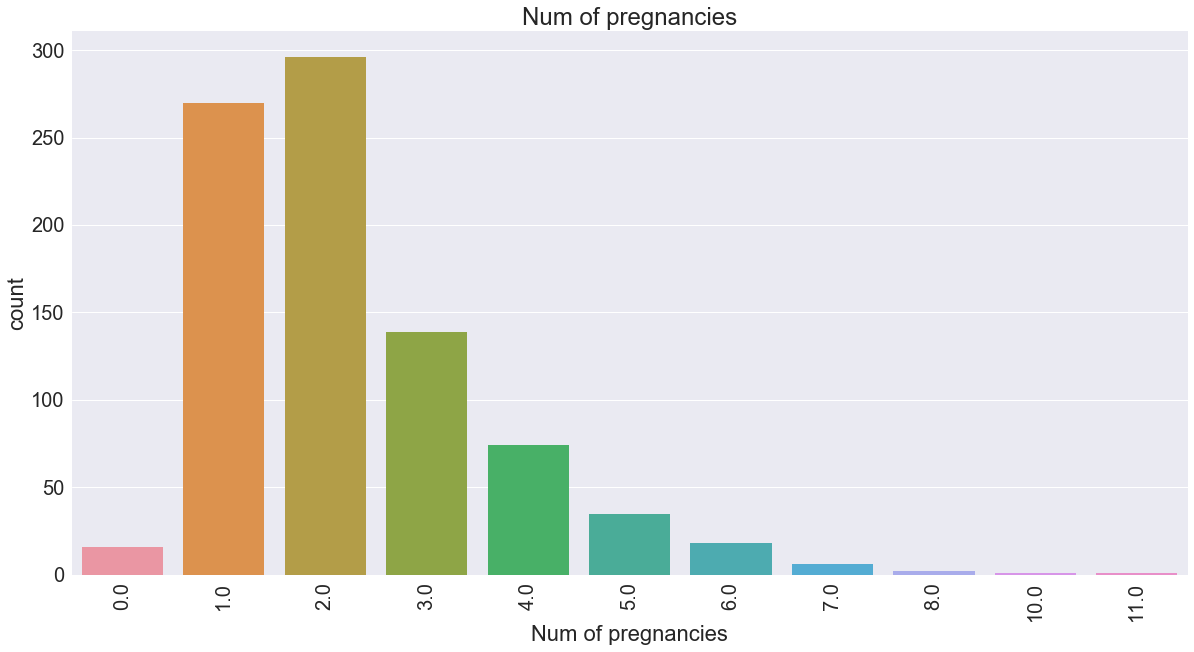



count    858.000000
mean       2.257576
std        1.400981
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       11.000000
Name: Num of pregnancies, dtype: float64
************************************************


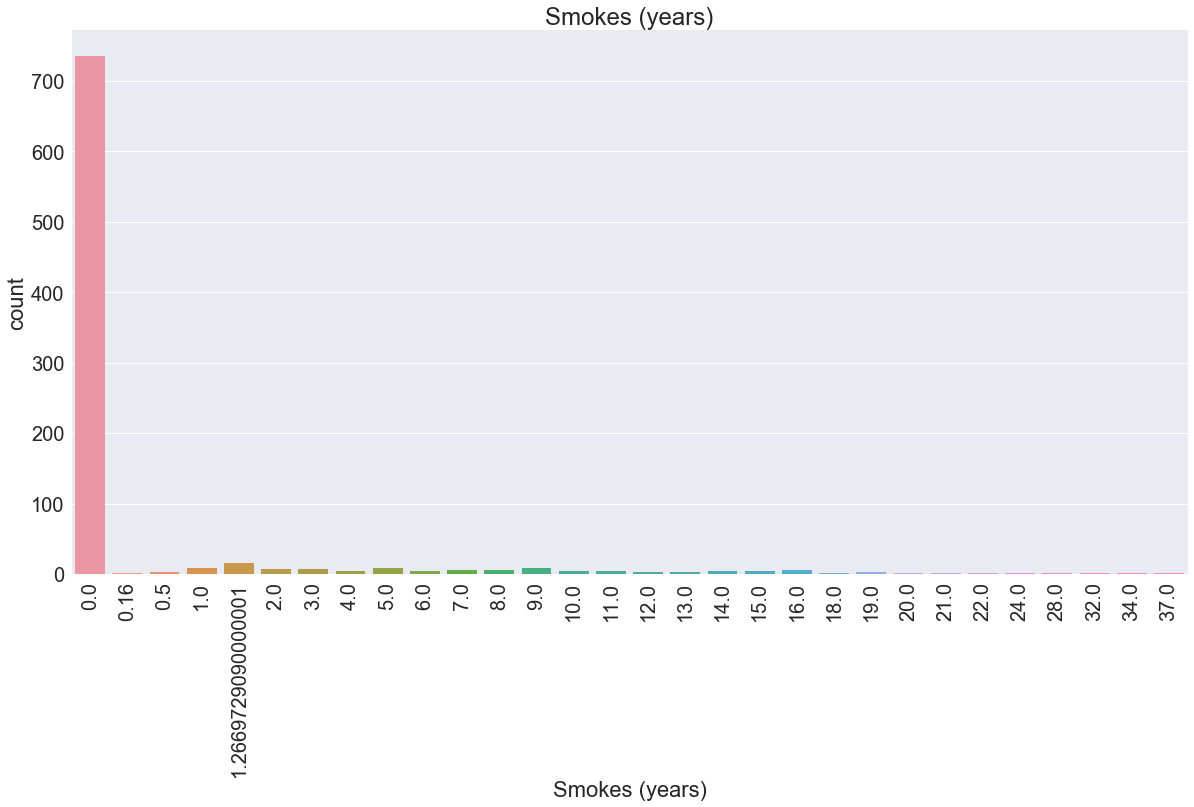



count    858.000000
mean       1.201241
std        4.060623
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       37.000000
Name: Smokes (years), dtype: float64
************************************************


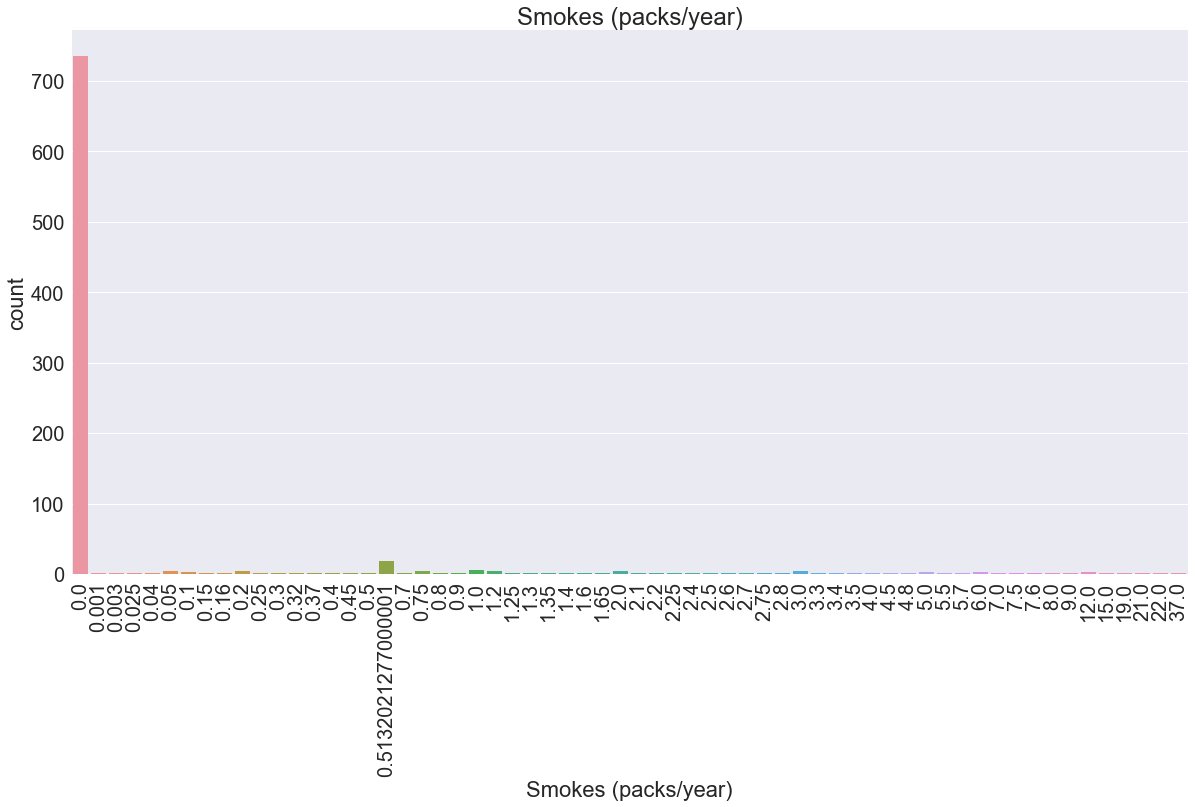



count    858.000000
mean       0.446278
std        2.210351
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       37.000000
Name: Smokes (packs/year), dtype: float64
************************************************


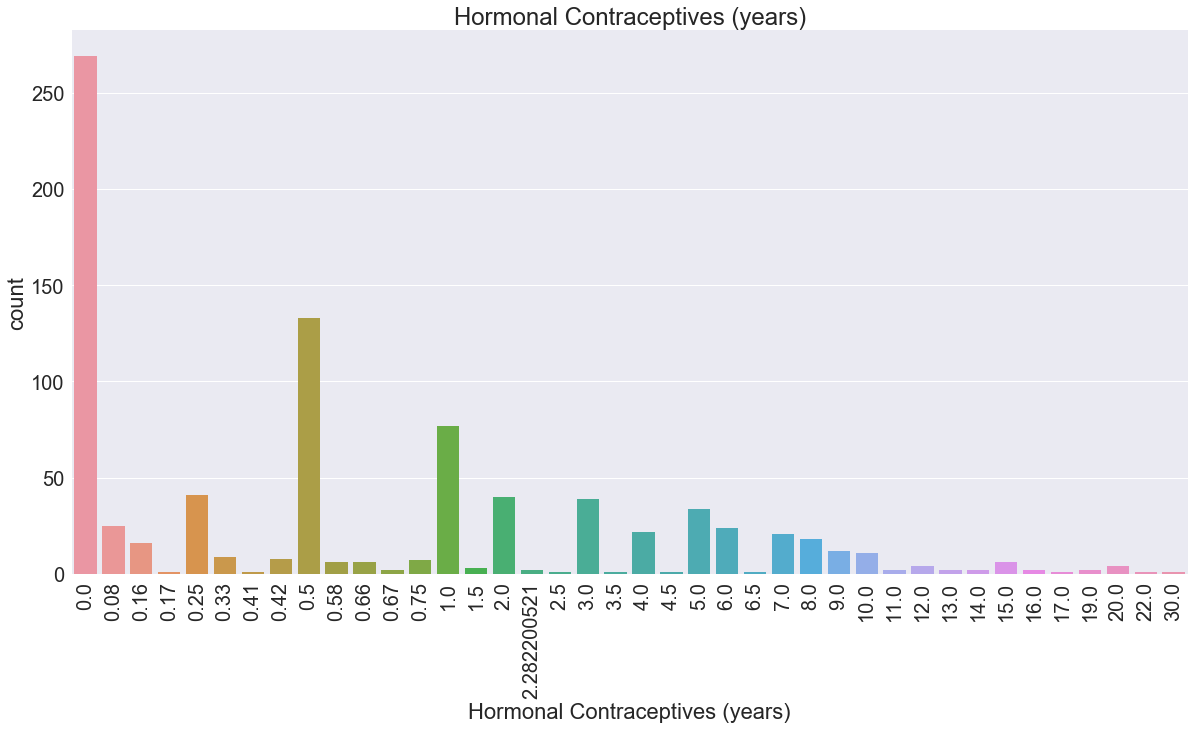



count    858.000000
mean       2.035331
std        3.567040
min        0.000000
25%        0.000000
50%        0.500000
75%        2.000000
max       30.000000
Name: Hormonal Contraceptives (years), dtype: float64
************************************************


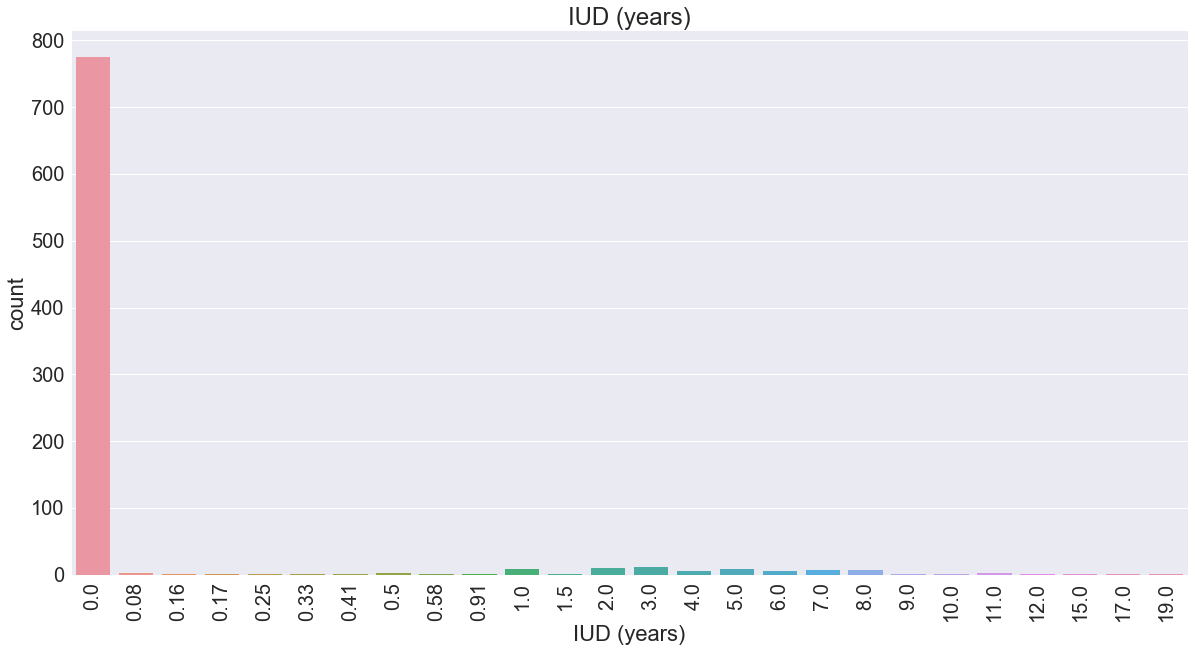



count    858.000000
mean       0.444604
std        1.814218
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       19.000000
Name: IUD (years), dtype: float64
************************************************


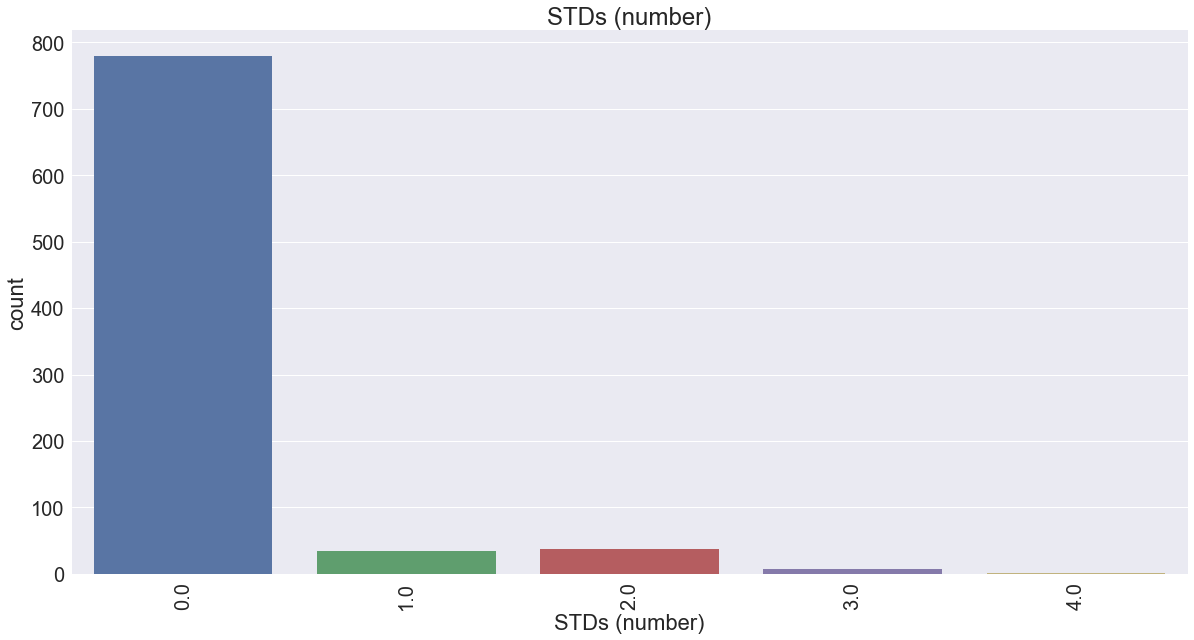



count    858.000000
mean       0.155012
std        0.529617
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        4.000000
Name: STDs (number), dtype: float64
************************************************


In [49]:
for col in continuous_cols:
    fig = plt.figure(figsize=(20,10))
    sns.countplot(x=col, data=df2)
    plt.title(col)
#     plt.xlabel(col[0],  )
    plt.xticks(rotation=90)
    plt.show()
    print("\n")
    print(df2[col].describe())
    print('************************************************')

In [50]:
# create X and y
# X = df2.drop('Biopsy' axis=1)  #original version
# X = df2.drop(['Biopsy', 'Hinselmann', 'Schiller', 'Citology'], axis=1)  #temporarily disabled, keeping all but Biopsy
X = df2.drop(['Biopsy'], axis=1)

y = df2['Biopsy']


In [51]:
X.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),...,is_number_pregnancies_known,Hormonal Contraceptives_0.0,Hormonal Contraceptives_1.0,Hormonal Contraceptives_nan,IUD_0.0,IUD_1.0,IUD_nan,STDs_0.0,STDs_1.0,STDs_nan
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,1,0,0,1,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,1,0,0,1,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,1,0,0,1,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,3.0,0.0,0.0,...,1,0,1,0,1,0,0,1,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,15.0,0.0,0.0,...,1,0,1,0,1,0,0,1,0,0


In [52]:
X.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
       'STDs:condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:HIV', 'STDs:Hepatitis B',
       'STDs:HPV', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann',
       'Schiller', 'Citology', 'is_number_partners_known',
       'is_first_intercourse_known', 'is_number_pregnancies_known',
       'Hormonal Contraceptives_0.0', 'Hormonal Contraceptives_1.0',
       'Hormonal Contraceptives_nan', 'IUD_0.0', 'IUD_1.0', 'IUD_nan',
       'STDs_0.0', 'STDs_1.0', 'STDs_nan'],
      dtype='object')

In [53]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Biopsy, dtype: int64

In [54]:
# create 80/20 train/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 10)


In [55]:
type(X_train)

pandas.core.frame.DataFrame

In [56]:
# Look at the numeric features and choose normalization or standardization
# none of these features have a "normal" distribution. Only Age is moderately "normal".

In [57]:
# standardize the continuous factors

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))

X_train = pd.DataFrame(minmax_scale.fit_transform(X_train))
X_test = pd.DataFrame(minmax_scale.fit_transform(X_test))


In [58]:
type(X_train)

pandas.core.frame.DataFrame

In [59]:
print(X_train.shape)
print(y_train.shape)

(686, 39)
(686,)


In [60]:
print(X_test.shape)
print(y_test.shape)

(172, 39)
(172,)


In [62]:
y_train.value_counts()

0    647
1     39
Name: Biopsy, dtype: int64

In [63]:
y_test.value_counts()

0    156
1     16
Name: Biopsy, dtype: int64

# Logistic Regression

f1=0.190 auc=0.449 ap=0.469


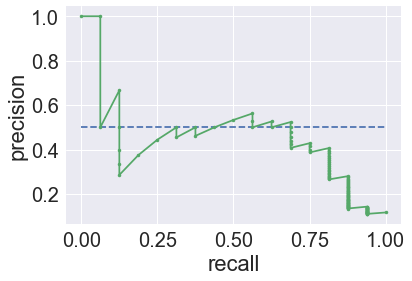

In [64]:
# current block

model = LogisticRegression(fit_intercept = False,
                                C = 1e12,
                                class_weight='balanced',
                                solver='lbfgs',
                               max_iter = 4000)

model.fit(X_train, y_train)


# predict probabilities
probs = model.predict_proba(X_test)
# print("probs shape before drop zero: ", probs.shape)

# keep probabilities for the positive outcome only
probs = probs[:, 1]
# print("probs shape after drop zero: ", probs.shape)

# predict class values
yhat = model.predict(X_test)

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# calculate F1 score
f1 = f1_score(y_test, yhat)

# calculate precision-recall AUC
auc_score = auc(recall, precision)

# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc_score, ap))


# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')
plt.xlabel('recall')
plt.ylabel('precision')

# show the plot
plt.show()

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=4000,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
AUC for None: 0.8417467948717949
LogisticRegression(C=1000000000000.0, class_weight='balanced', dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=4000,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
AUC for Balanced: 0.8621794871794871
LogisticRegression(C=1000000000000.0, class_weight={1: 2, 0: 1}, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=4000,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
AUC for 2 to 1: 0.8385416666666667
LogisticRegression(C=1000000000000.0, class_weight={1: 1

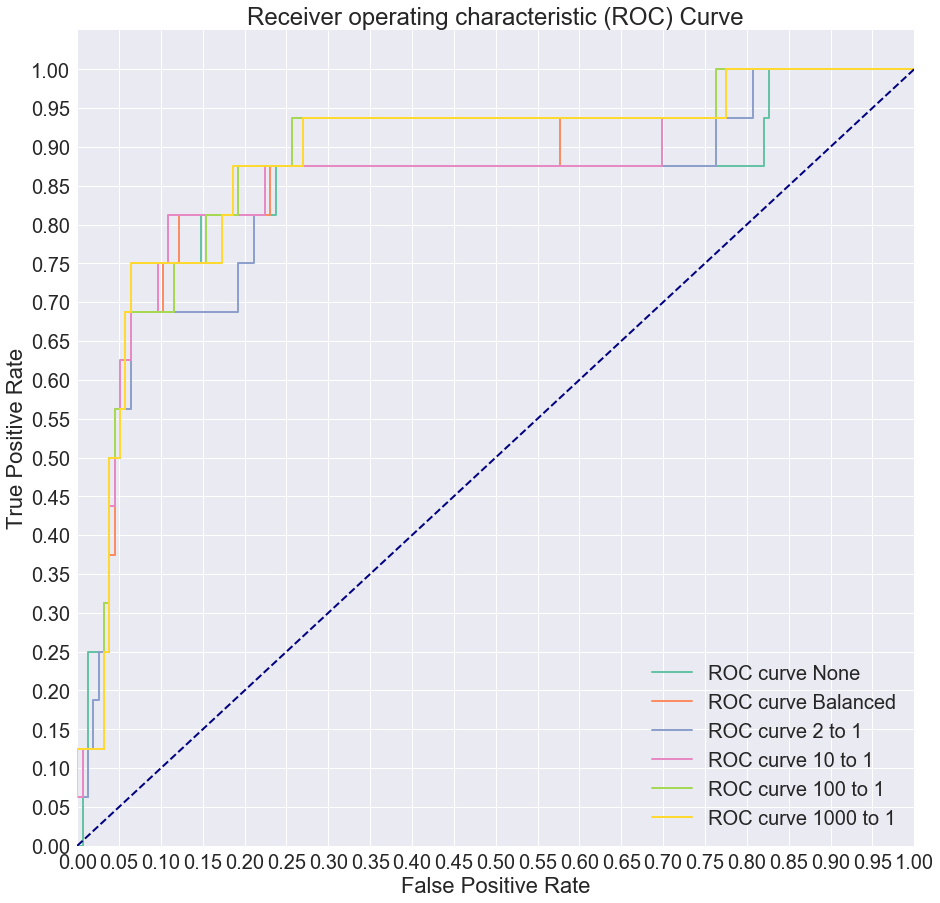

In [65]:
# trying logistic regression with different weights
weights = [None, 'balanced', {1:2, 0:1}, {1:10, 0:1}, {1:100, 0:1}, {1:1000, 0:1}]
names = ['None', 'Balanced', '2 to 1', '10 to 1', '100 to 1', '1000 to 1']
colors = sns.color_palette("Set2")

plt.figure(figsize=(15,15))

for n, weight in enumerate(weights):
    #Fit a model
    logreg = LogisticRegression(fit_intercept = False,
                                C = 1e12,
                                class_weight=weight,
                                solver='lbfgs',
                               max_iter = 4000) #Starter code
    
    model_log = logreg.fit(X_train, y_train)
    
    print(model_log) #Preview model params

    #Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.fit(X_train, y_train).decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
#     precision, recall, thresholds = precision_recall_curve(y_test, y_score) # second argument is probas_pred
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve {}'.format(names[n]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# KNN
K nearest neighbors doesn't work well with extremely unbalanced data like this

In [66]:
# KNN
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)

In [68]:
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[149   7]
 [ 10   6]]
             precision    recall  f1-score   support

          0       0.94      0.96      0.95       156
          1       0.46      0.38      0.41        16

avg / total       0.89      0.90      0.90       172



In [69]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, preds)

Precision Score: 0.46153846153846156
Recall Score: 0.375
Accuracy Score: 0.9011627906976745
F1 Score: 0.41379310344827586


In [70]:
# find best K for f1 score
# https://en.wikipedia.org/wiki/F1_score

def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=5):
    best_k = 0
    best_score = 0.0
    
    for k in range(min_k, max_k+1, 1):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        print('k: {}'.format(k))
        print('F1-Score: {}'.format(f1))
        if f1 > best_score:
            best_k = k
            best_score = f1
    print('Best Value for k: {}'.format(best_k))
    print('F1-Score: {}'.format(best_score))

In [71]:
find_best_k(X_train, y_train, X_test, y_test)

k: 1
F1-Score: 0.41379310344827586
k: 2
F1-Score: 0.0
k: 3
F1-Score: 0.19047619047619047
k: 4
F1-Score: 0.0
k: 5
F1-Score: 0.2
Best Value for k: 1
F1-Score: 0.41379310344827586


In [72]:
# find best K for recall
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=5):
    best_k = 0
    best_score = 0.0
    
    for k in range(min_k, max_k+1, 1):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        recall = recall_score(y_test, preds)

        print('k: {}'.format(k))
        print('Recal Score: {}'.format(recall))
        if recall > best_score:
            best_k = k
            best_score = recall
    print('Best Value for k: {}'.format(best_k))
    print('Recall Score: {}'.format(best_score))

In [73]:
find_best_k(X_train, y_train, X_test, y_test)

k: 1
Recal Score: 0.375
k: 2
Recal Score: 0.0
k: 3
Recal Score: 0.125
k: 4
Recal Score: 0.0
k: 5
Recal Score: 0.125
Best Value for k: 1
Recall Score: 0.375


In [74]:
# try a grid search
# because this is predicting cancer, it is far more preferable to not miss any positives.
# So preference is given to a model that has a high recall (what percentage of actual cases of cancer did we capture in our prediction)
# This will mean more false positives (predicted as having cancer, but no cancer in reality), 
# but this is preferable to missing any cancer cases.




In [76]:
# Decision Tree 
tree_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 5) 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [77]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6, 7]}

dt_grid_search = GridSearchCV(tree_clf, 
                              param_grid = dt_param_grid, 
                              scoring = 'recall',
                              cv=2, 
                              return_train_score=True)

In [79]:
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=2, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=0)

In [81]:
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print("Mean Training Score: {:.4}%".format(dt_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(dt_gs_testing_score * 100))
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 91.18%
Mean Testing Score: 68.75%
Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy', 'max_depth': 2}

In [94]:
tree_clf = DecisionTreeClassifier(criterion = "entropy", max_depth = 2) 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [95]:
tree_clf.feature_importances_

array([0.04478035, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.06570044, 0.        , 0.        , 0.        ,
       0.88951921, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

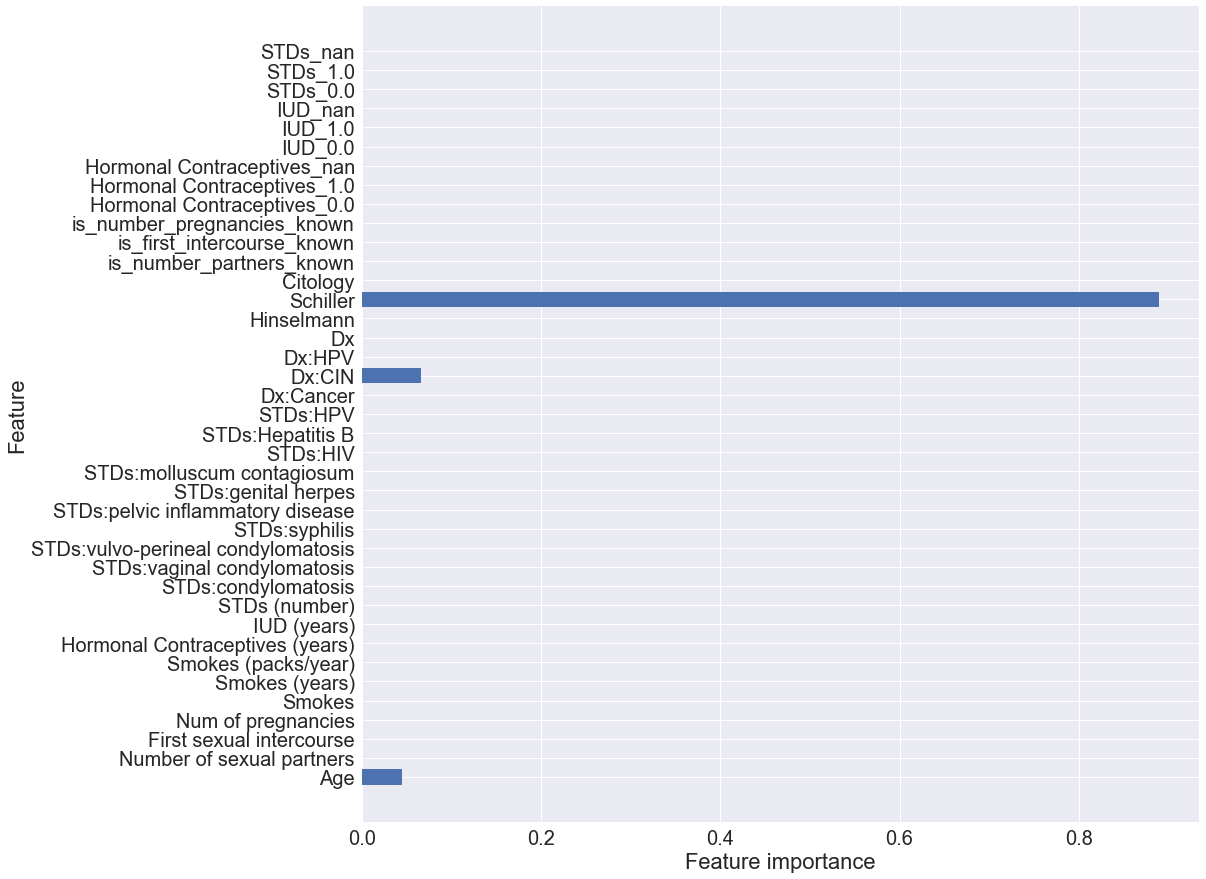

In [96]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(15,15))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X.columns) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(tree_clf)
plt.show()

In [131]:
preds = pd.DataFrame(tree_clf.predict(X_test))
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))
print_metrics(y_test, preds)

[[149   7]
 [  5  11]]
             precision    recall  f1-score   support

          0       0.97      0.96      0.96       156
          1       0.61      0.69      0.65        16

avg / total       0.93      0.93      0.93       172

Precision Score: 0.6111111111111112
Recall Score: 0.6875
Accuracy Score: 0.9302325581395349
F1 Score: 0.6470588235294118


In [113]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, preds) * 100))

Testing Accuracy for Decision Tree Classifier: 93.02%


In [126]:
print_metrics(y_test, preds)

Precision Score: 0.6111111111111112
Recall Score: 0.6875
Accuracy Score: 0.9302325581395349
F1 Score: 0.6470588235294118


In [127]:
y_test.value_counts(normalize=True)

0    0.906977
1    0.093023
Name: Biopsy, dtype: float64

In [128]:
preds[0].value_counts(normalize=True)


0    0.895349
1    0.104651
Name: 0, dtype: float64

In [129]:
# random forest

# forest = RandomForestClassifier(n_estimators=5, max_depth= 3, random_state=0)  #score: .9128
# forest = RandomForestClassifier(n_estimators=5, max_depth= 5, random_state=0)  #score: .8953
# forest = RandomForestClassifier(n_estimators=10, max_depth= 3, random_state=0)  #score: .9128
# forest = RandomForestClassifier(n_estimators=45, max_depth= 18, random_state=0)  #score: .9011
# forest = RandomForestClassifier(n_estimators=70, max_depth= 8, random_state=0)  #score: .9011
# forest = RandomForestClassifier(n_estimators=200, max_depth= 8, random_state=0)  #score: .9011

forest = RandomForestClassifier(n_estimators=100, class_weight='balanced', max_depth= 5, random_state=0)

forest.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [132]:
preds = pd.DataFrame(forest.predict(X_test))
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))
print_metrics(y_test, preds)

[[150   6]
 [  6  10]]
             precision    recall  f1-score   support

          0       0.96      0.96      0.96       156
          1       0.62      0.62      0.62        16

avg / total       0.93      0.93      0.93       172

Precision Score: 0.625
Recall Score: 0.625
Accuracy Score: 0.9302325581395349
F1 Score: 0.625


In [133]:
forest.score(X_test, y_test)

0.9302325581395349

In [134]:
# use grid search for the random forest classifier, use recall as the factor to optimize
forest = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=0)

In [138]:
forest_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [25, 50, 100, 200]}

forest_grid_search = GridSearchCV(forest, 
                                  param_grid = forest_param_grid, 
                                  scoring = 'recall',
                                  cv=3,
                                  return_train_score=True)

In [139]:
import time
start = time.time()

forest_grid_search.fit(X_train, y_train)

print("Testing Accuracy: {:.4}%".format(forest_grid_search.best_score_ * 100))
print("Total Runtime for Grid Search on Random Forest Classifier: {:.4} seconds".format(time.time() - start))
print("")
print("Optimal Parameters: {}".format(forest_grid_search.best_params_))


Testing Accuracy: 87.18%
Total Runtime for Grid Search on Random Forest Classifier: 9.776 seconds

Optimal Parameters: {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 25}


In [143]:
forest = RandomForestClassifier(n_estimators=25, criterion='gini', max_depth=3, class_weight='balanced', random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=25, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [144]:
preds = forest.predict(X_test)
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[149   7]
 [  3  13]]
             precision    recall  f1-score   support

          0       0.98      0.96      0.97       156
          1       0.65      0.81      0.72        16

avg / total       0.95      0.94      0.94       172



In [145]:
# test_preds = pred
print_metrics(y_test, preds)

Precision Score: 0.65
Recall Score: 0.8125
Accuracy Score: 0.9418604651162791
F1 Score: 0.7222222222222223


In [148]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking by importance (best to worst):")

for f in range(X_train.shape[1]):
    print('{}  -  {}'.format(importances[indices[f]], X.columns[f]))


Feature ranking by importance (best to worst):
0.38156147569503845  -  Age
0.14605027725599265  -  Number of sexual partners
0.12186330610992525  -  First sexual intercourse
0.07373451150266269  -  Num of pregnancies
0.0408880559520167  -  Smokes
0.02885778936667957  -  Smokes (years)
0.022252926354971798  -  Smokes (packs/year)
0.019743133166129846  -  Hormonal Contraceptives (years)
0.019323090150091517  -  IUD (years)
0.016983404374382446  -  STDs (number)
0.014798303196180038  -  STDs:condylomatosis
0.014687091167886608  -  STDs:vaginal condylomatosis
0.01293619053948214  -  STDs:vulvo-perineal condylomatosis
0.012632097736580448  -  STDs:syphilis
0.0101308623037267  -  STDs:pelvic inflammatory disease
0.009996498751552107  -  STDs:genital herpes
0.009681679697343263  -  STDs:molluscum contagiosum
0.008800326517694265  -  STDs:HIV
0.008705647045606777  -  STDs:Hepatitis B
0.004875190099640068  -  STDs:HPV
0.004512792499081504  -  Dx:Cancer
0.0038403519158178656  -  Dx:CIN
0.0034955

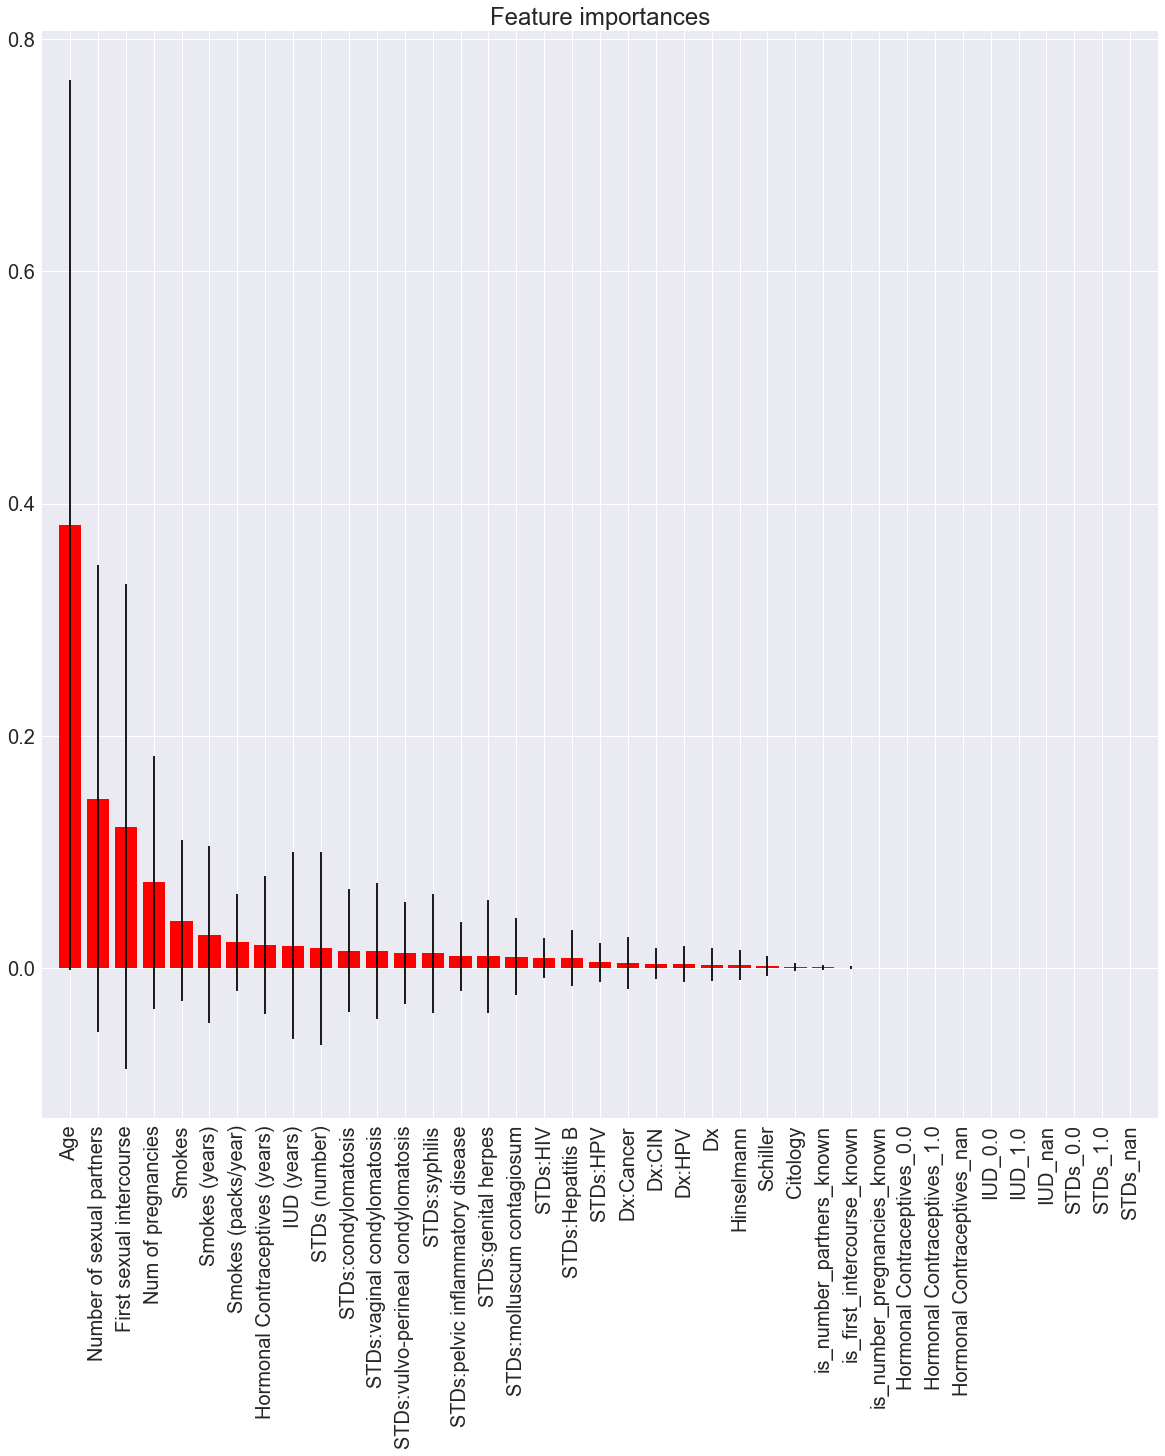

In [153]:
# Plot the feature importances of the forest
plt.figure(figsize=(20,20))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X.columns, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [155]:
from imblearn.combine import SMOTETomek

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 10)


# standardize the continuous factors
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
# X_train_scaled = pd.DataFrame(minmax_scale.fit_transform(X_train))
# X_test_scaled = pd.DataFrame(minmax_scale.fit_transform(X_test))

X_train_scaled = X_train  #this model works better when I don't scale the non-categorical factors ???
X_test_scaled = X_test


cc = SMOTETomek(random_state=10)

X_res, y_res = (X_train_scaled, y_train)

forest = RandomForestClassifier(n_estimators=350, class_weight='balanced', max_depth= 5, random_state=0)
# big shift from n_estimators from 350 to 375, where it appears to peak

forest.fit(X_res, y_res)

y_pred = forest.predict(X_test_scaled)

print('Accuracy score: ' + str(accuracy_score(y_test, y_pred)))
print('Recall score: ' + str(recall_score(y_test, y_pred)))


In [ ]:
# Random forest from kaggle - test with only one factor
# https://www.kaggle.com/niyamatalmass/ml-explainability-deep-dive-into-the-ml-model

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, shuffle=True, test_size = 0.25, random_state=2019)
random_forest = RandomForestClassifier(n_estimators=500, random_state=2019).fit(X_train_2, y_train_2)
y_pred_2 = random_forest.predict(X_test_2)
print('Accuracy score: ' + str(accuracy_score(y_test_2, y_pred_2)))

In [ ]:
recall_score(y_test_2, y_pred_2)

In [ ]:
# SMOTE w/random forest from
# # https://www.kaggle.com/niyamatalmass/ml-explainability-deep-dive-into-the-ml-model


X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size = 0.25,random_state=2019)

cc = SMOTETomek(random_state=2019)
X_res, y_res = cc.fit_resample(X_train, y_train)

random_forest = RandomForestClassifier(n_estimators=500, random_state=2019).fit(X_res, y_res)
y_pred = random_forest.predict(X_test)
print('Accuracy score: ' + str(accuracy_score(y_test, y_pred)))
print('Recall score: ' + str(recall_score(y_test, y_pred)))

In [ ]:
x_res.value_counts()

# SVM

In [165]:
clf = svm.SVC(cache_size=1000, gamma='scale', class_weight={0:1, 1:10})


In [169]:
clf

SVC(C=1.0, cache_size=1000, class_weight={0: 1, 1: 10}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [170]:
clf.fit(X_train, y_train)  


TypeError: must be real number, not str

In [ ]:
preds = clf.predict(X_test)

In [ ]:
preds = forest.predict(X_test)
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

In [ ]:
y_test.shape

In [ ]:
preds.shape

In [ ]:
clf.score(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
recall_score(y_test, preds, average=None)